ASP.NET Core using two pieces of middleware to handle routing and execute endpoints  
  
- `EndpointMiddleware`—You use this middleware to register the endpoints in the routing system when you start your application. The middleware executes one of the endpoints at runtime.  
  
- `RoutingMiddleware`—This middleware chooses which of the endpoints
registered by the EndpointMiddleware should execute for a given
request at runtime.

The `EndpointMiddleware` is where you ***register*** all the `endpoints` in your app,
including `minimal APIs`, `Razor Pages`, and `MVC controllers`.

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

builder.Services.AddRazorPages(); 

var app = builder.Build();

app.UseStaticFiles();

app.UseRouting(); 

app.MapRazorPages();

app.Run();

**Each endpoint**( whether it’s a Razor Page or a minimal API), has an associated
`route template` that defines **which URLs** the ***endpoint should match***. The
`EndpointMiddleware` stores these **route templates** and ***endpoints*** in a
`dictionary`, which it ***shares*** with the `RoutingMiddleware`.

At runtime the `RoutingMiddleware` ***compares*** the `incoming request` with the routes in the `dictionary` and ***selects*** the `matching endpoint`.

When the ***request*** reaches the `EndpointMiddleware`, the middleware checks to see ***which endpoint*** was `selected` and `executes it`

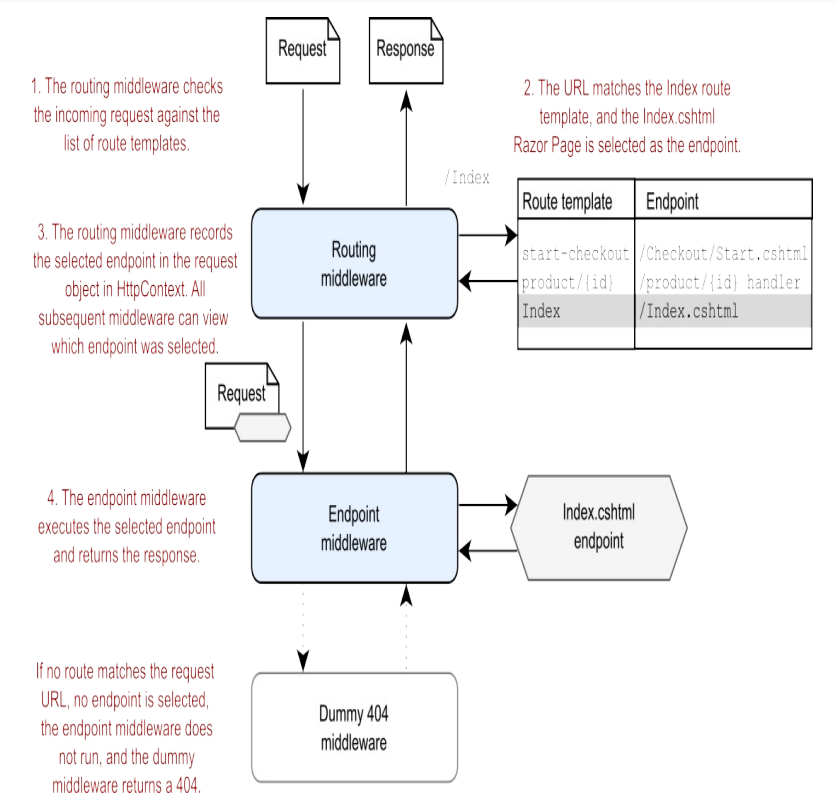

any middleware `placed after` the ***RoutingMiddleware*** `can see` **which endpoint** is going to be `executed` before it is

***Routing in ASP.NET Core*** uses the `same infrastructure` and `middleware`
whether you’re building `minimal APIs`, `Razor Pages`, or `MVC controllers`

but there are ***some differences*** in `how you define` the ***mapping between*** your `route templates` and your `handlers` in each case.